In [ ]:
# Robust fbprophet shim → maps to the maintained 'prophet' package (Python 3.12 friendly)
import sys, types, importlib

# 1) Install/ensure 'prophet'
!pip -q install prophet

import prophet as _prophet

# 2) Build a shim module named 'fbprophet'
fbprophet = types.ModuleType("fbprophet")
setattr(fbprophet, "__version__", getattr(_prophet, "__version__", "shim"))

# Always expose Prophet class
fbprophet.Prophet = _prophet.Prophet

# 3) Try to mirror common submodules; create empty stubs if missing
def _get_or_stub(subname):
    # Try attribute on prophet
    sub = getattr(_prophet, subname, None)
    if sub is not None:
        return sub
    # Try import prophet.subname
    try:
        return importlib.import_module(f"prophet.{subname}")
    except Exception:
        # Create an empty stub module so imports like `from fbprophet import serialize` don't fail
        return types.ModuleType(f"fbprophet.{subname}")

for _name in ["forecaster", "plot", "diagnostics", "serialize"]:
    _sub = _get_or_stub(_name)
    setattr(fbprophet, _name, _sub)
    sys.modules[f"fbprophet.{_name}"] = _sub

# 4) Register the shim so `import fbprophet` (and submodules) works unchanged
sys.modules["fbprophet"] = fbprophet

print("✅ fbprophet shim active — using 'prophet' backend", getattr(_prophet, "__version__", ""))


✅ fbprophet shim active — using 'prophet' backend 1.1.7


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
!pip install fbprophet
import fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.1 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 kB)

In [ ]:
import urllib.request, os

url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/GOOG.csv"
outfile = "GOOG.csv"

urllib.request.urlretrieve(url, outfile)
print("Downloaded:", outfile, "-", os.path.getsize(outfile), "bytes")


Downloaded: GOOG.csv - 19925 bytes


In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
1,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000
2,2019-08-13,1171.459961,1204.780029,1171.459961,1197.270020,1197.270020,1294400
3,2019-08-14,1176.310059,1182.300049,1160.540039,1164.290039,1164.290039,1578700
4,2019-08-15,1163.500000,1175.839966,1162.109985,1167.260010,1167.260010,1218700


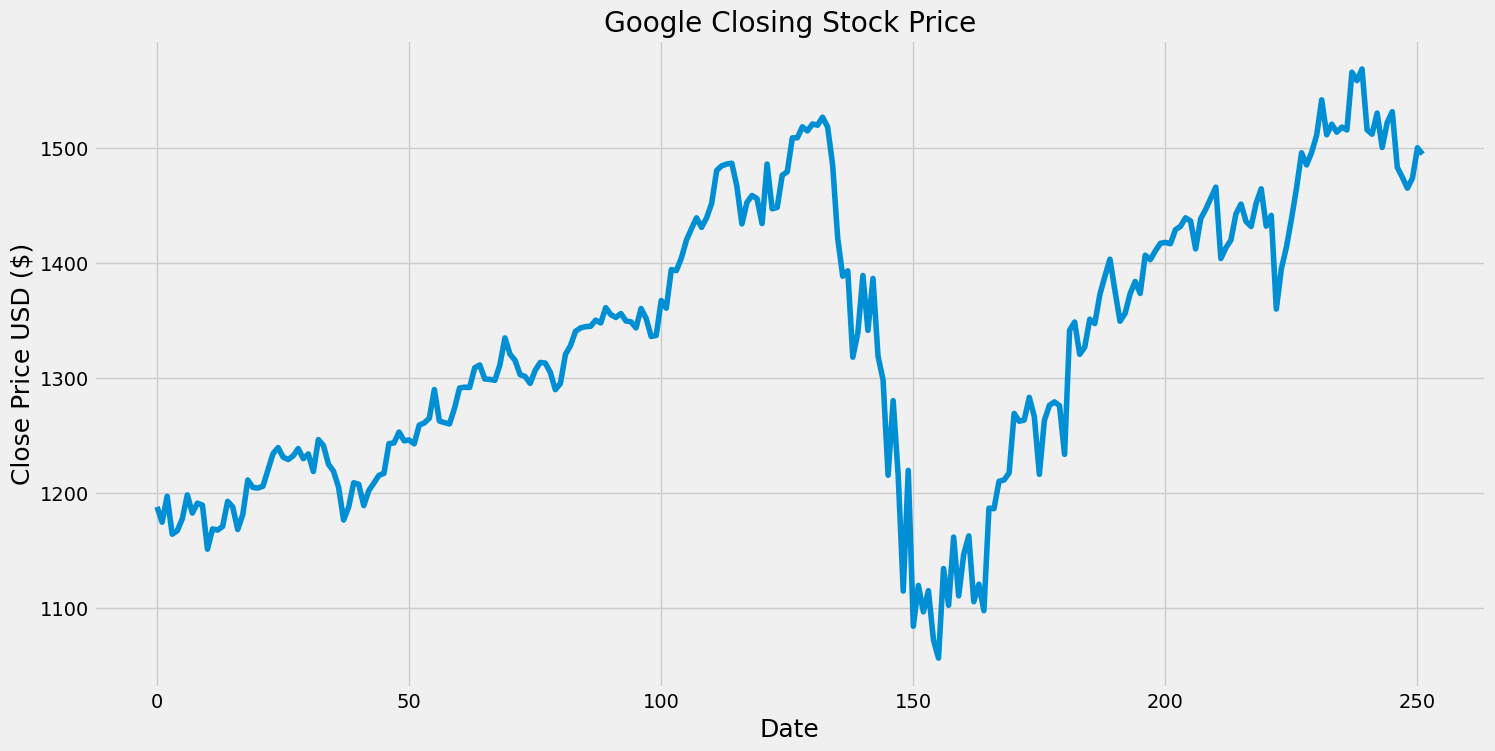

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [ ]:
data = data[["Date","Close"]]
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2019-08-09,1188.010010
1,2019-08-12,1174.709961
2,2019-08-13,1197.270020
3,2019-08-14,1164.290039
4,2019-08-15,1167.260010


In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppm9gx26m/iu7ry4yf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppm9gx26m/z1gwewep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37056', 'data', 'file=/tmp/tmppm9gx26m/iu7ry4yf.json', 'init=/tmp/tmppm9gx26m/z1gwewep.json', 'output', 'file=/tmp/tmppm9gx26m/prophet_model7oe3pztp/prophet_model-20251006145741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


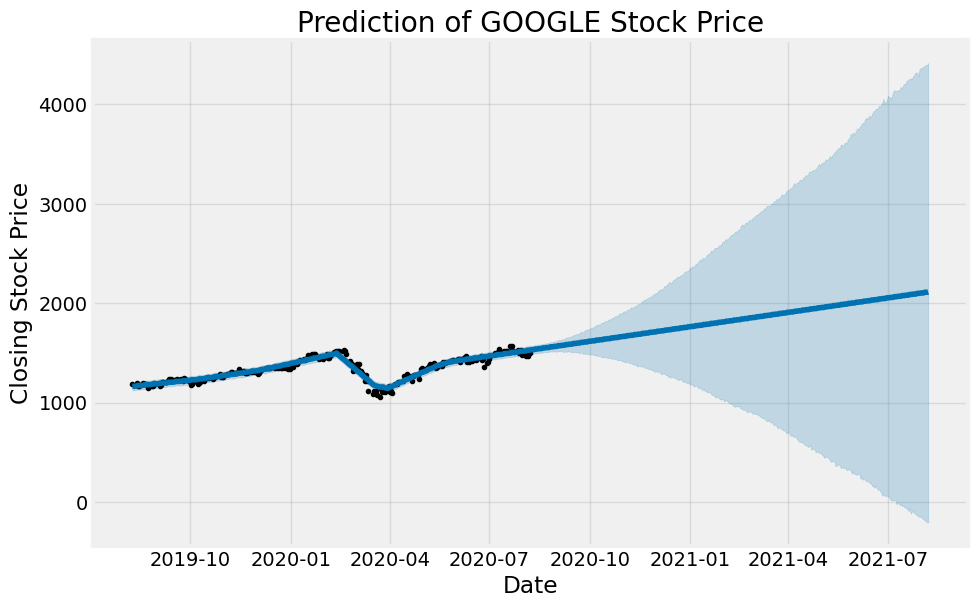

In [ ]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

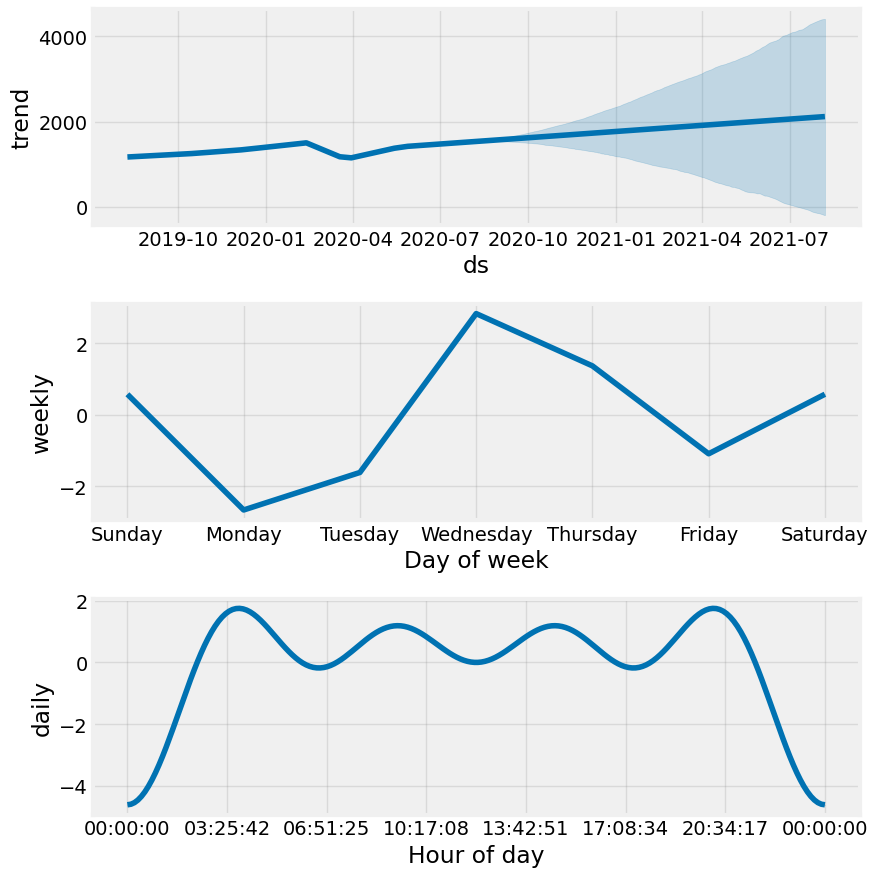

In [ ]:
m.plot_components(predictions)
plt.show()